Rizky Wira Pranata (1301174298)
Klasifikasi menggunakan metode Naive Bayes

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io as io

In [2]:
#untuk membaca file
df = pd.read_csv('used_cars.csv')

In [3]:
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
5,5,7034406582,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,13999,2009.0,ram,NaN,NaN,...,4wd,NaN,pickup,silver,https://images.craigslist.org/00y0y_RR9x2lk7eh...,"2009 RAM 1500 4WD Quad Cab 140.5"" ST"" Offe...",NaN,ut,40.3744,-104.694
6,6,7034405619,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2017.0,ford,f-350,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00k0k_lIBatiU90s...,2017 Ford Super Duty F-350 F350 F 350 SRW Crew...,NaN,ut,40.3744,-104.694
7,7,7034405349,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,14500,2007.0,gmc,sierra,NaN,...,4wd,NaN,pickup,NaN,https://images.craigslist.org/00202_jTNQzQVWZs...,2007 GMC Sierra 1500 SLE Crew Cab 4WD Offe...,NaN,ut,40.3744,-104.694
8,8,7034404595,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,12500,2013.0,ford,f-250,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00F0F_99lwfqrZWc...,2013 Ford F-250 F250 F 250 SD XLT 4WD Offe...,NaN,ut,40.3744,-104.694
9,9,7034401857,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,34500,2012.0,ram,NaN,NaN,...,4wd,NaN,pickup,silver,https://images.craigslist.org/00a0a_1cDSDtUsLA...,"2012 RAM 2500 4WD Mega Cab 160.5"" Laramie Long...",NaN,ut,40.3744,-104.694


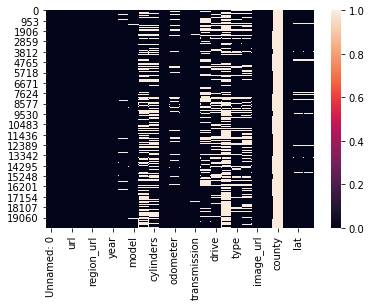

In [4]:
#melihat data kosong 
import seaborn as sns
ax = sns.heatmap(df.isna())

In [5]:
#mengganti data transmission menjadi 0 1
df_temp = df[['price', 'odometer', 'transmission']]

df_temp = df['transmission'].apply(lambda x: 1 if x == 'automatic' else 0)
df_temp = df['transmission'].apply(lambda x: 1 if x == 'manual' else 0)
df_temp = df[['price', 'odometer', 'transmission']]
df_temp.shape

(20001, 3)

In [6]:
#menghapus kolom yang kosong
df_temp['price'].replace('', np.nan, inplace=True)
df_temp['odometer'].replace('', np.nan, inplace=True)
df_temp['transmission'].replace('', np.nan, inplace=True)

df_temp.dropna(subset=['price'], inplace=True)
df_temp.dropna(subset=['odometer'], inplace=True)
df_temp.dropna(subset=['transmission'], inplace=True)

df = df_temp[['price', 'odometer', 'transmission']]

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is t

In [7]:
#untuk mengambil kolom yang diinginkan dari dataset yang sudah ada
df = df[['price', 'odometer', 'transmission']]

In [8]:
# untuk mengecek apakah ada baris atau data yang kosong
df.isna().sum()
#untuk mendrop data yang kosong sehingga semua datanyanya tidak ada yang kosong
df.dropna(inplace=True)
df

,price,odometer,transmission
0,17899,63500.0,manual
1,0,10.0,automatic
2,46463,7554.0,automatic
3,0,10.0,automatic
4,49999,70150.0,automatic
5,13999,120057.0,automatic
6,34500,95484.0,automatic
7,14500,89340.0,automatic
8,12500,226031.0,automatic
9,34500,128153.0,automatic


In [9]:
df['price'].describe()

count    1.742400e+04
mean     1.927273e+04
std      9.352547e+05
min      0.000000e+00
25%      4.000000e+03
50%      8.999000e+03
75%      1.799500e+04
max      1.234568e+08
Name: price, dtype: float64

In [10]:
df2 = df[df['price'] > 3]

In [11]:
df2 = df2[['price', 'odometer', 'transmission']]

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 0 to 20000
Data columns (total 3 columns):
price           15200 non-null int64
odometer        15200 non-null float64
transmission    15200 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 475.0+ KB


In [13]:
#mendrop transmission pada x
x  = df2.drop(['transmission'], axis = 1)
x.head()

,price,odometer
0,17899,63500.0
2,46463,7554.0
4,49999,70150.0
5,13999,120057.0
6,34500,95484.0


In [14]:
#memasukkan transmission pada y
y = df2['transmission']
y

0           manual
2        automatic
4        automatic
5        automatic
6        automatic
7        automatic
8        automatic
9        automatic
10          manual
11       automatic
12       automatic
13       automatic
14       automatic
15       automatic
16       automatic
17       automatic
18       automatic
19       automatic
20       automatic
21       automatic
23       automatic
24       automatic
25       automatic
26       automatic
27       automatic
28       automatic
29       automatic
30       automatic
31       automatic
32       automatic
           ...    
19952    automatic
19953    automatic
19961    automatic
19962    automatic
19963    automatic
19965    automatic
19966    automatic
19968    automatic
19969    automatic
19970    automatic
19971    automatic
19972    automatic
19974    automatic
19977    automatic
19978    automatic
19983    automatic
19984    automatic
19985    automatic
19987    automatic
19988    automatic
19990    automatic
19991    aut

In [20]:
# untuk membagi data ke dalam data train dan data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
x_train

,price,odometer
9697,13974,18000.0
2570,4995,81000.0
6753,12850,122151.0
695,900,199349.0
5645,13995,70250.0
16,35500,127515.0
229,36495,88244.0
2409,39998,60283.0
2678,8999,124000.0
10403,16499,18000.0


In [16]:
# menggunakan gaussianNB karena menggunakan metode naive bayes
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

array([10787.,   948.,   425.])

In [17]:
y_pred = nbtrain.predict(x_test)
y_pred

array(['automatic', 'automatic', 'automatic', ..., 'automatic',
       'automatic', 'automatic'], dtype='<U9')

In [18]:
#melihat akurasi score
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.8651315789473685

Kesimpulan dari klasifikasi yang saya gunakan dengan algoritma Naive Bayes adalah dengan melihat akurasi yang muncul yaitu 85% lebih yang menandakan bahwasanya dengan begitu algoritma untuk klasifikasi ini terbukti akurat.

In [21]:
x_train.to_csv('nyoba.csv')